In [19]:
import numpy as np
import sys, os, git
from matplotlib import pyplot as plt

In [20]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path+"/docs/inputs/shared-pyplot-files/")
from pyplot_parameters import colors, complete_panel, save_figure, set_boundaries
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[2][-1]
tutorial_name = path_in_folder.split("/")[3]
path_figures = "/docs/sphinx/source/tutorials/figures/level" + level + "/" + tutorial_name + "/"
print("level:" , level, "& tutorial name:", tutorial_name)
print("figures will be saved in", path_figures)

level: 3 & tutorial name: free-energy-calculation
figures will be saved in /docs/sphinx/source/tutorials/figures/level3/free-energy-calculation/


In [21]:
density_10 = np.loadtxt("density_profile_8ns.dat", skiprows=4)
_, x, _, density_10 = density_10.T
rho_bulk = 0.0033 # approximately

/home/simon/Git/LAMMPS/lammpstutorials.github.io/docs/inputs/shared-pyplot-files/pyplot_parameters.py:116: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.tight_layout()
/home/simon/Git/LAMMPS/lammpstutorials.github.io/docs/inputs/shared-pyplot-files/pyplot_parameters.py:118: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(git_root + path_figures + filename + "-light.png", bbox_inches = 'tight', pad_inches = 0.062, transparent=True)
/home/simon/Git/LAMMPS/lammpstutorials.github.io/docs/inputs/shared-pyplot-files/pyplot_parameters.py:120: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(git_root + path_figures + filename + "-dark.png", bbox_inches = 'tight', pad_inches = 0.062, transparent=True)
/home/simon/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


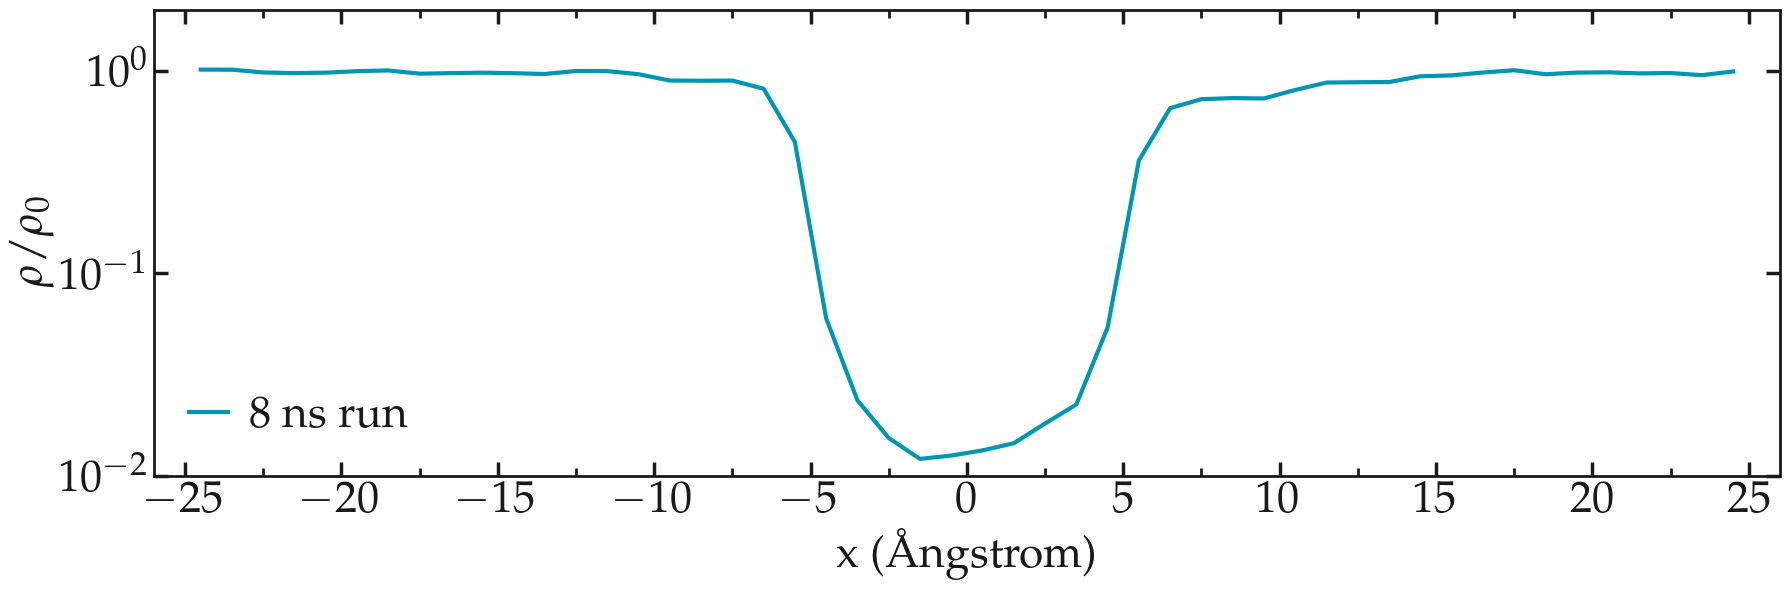

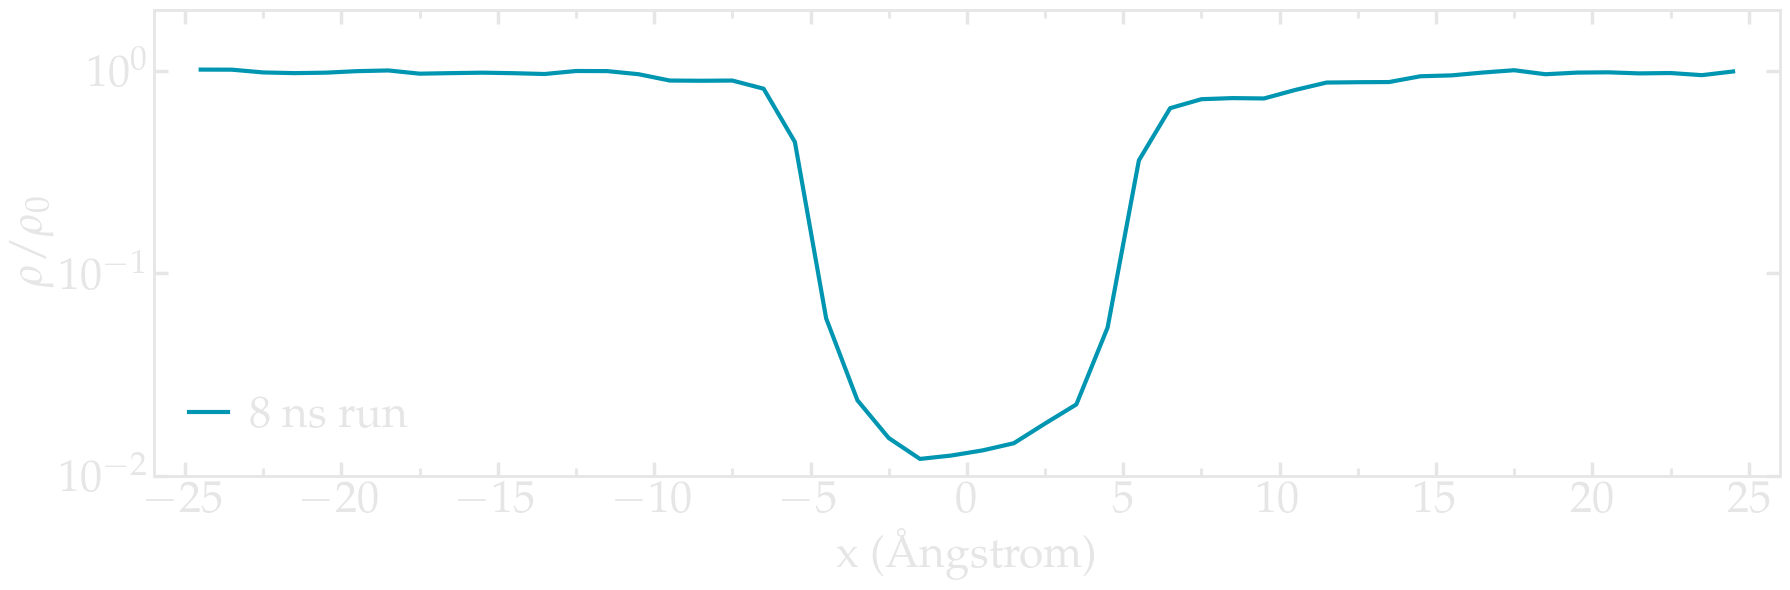

In [22]:
filename = "density_profile"
for mode, mygray in zip(['light', 'dark'], [colors["lightgray"], colors["darkgray"]]):    
    fig = plt.figure(figsize=(18,6))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].semilogy(x, density_10/rho_bulk, color=colors["myblue"], linewidth=3, label=r'8 ns run')
    complete_panel(ax[-1], r'x (Ångstrom)', r'$\rho / \rho_0$', legend=True, axis_color=mygray)
    set_boundaries(plt, x_ticks=np.arange(-25, 30, 5), x_boundaries=(-26, 26), y_boundaries=(0.01, 2))
    save_figure(fig, mode, git_path, path_figures, filename)